# Cross validated CNN Model With Contamination

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

In [ ]:
# Load dataset into memory
# Get the project root directory
# Try to find project root by looking for "Scanpaths" folder
current_dir = os.getcwd()
project_root = current_dir

# Navigate up to find project root (where "Scanpaths" exists)
for _ in range(3):  # Check up to 3 levels up
    if os.path.exists(os.path.join(current_dir, "Scanpaths")):
        project_root = current_dir
        break
    parent = os.path.dirname(current_dir)
    if parent == current_dir:  # Reached filesystem root
        break
    current_dir = parent

# Dataset path: Scanpaths/contaminated (at project root)
dataset_path = os.path.join(project_root, "Scanpaths", "contaminated")

# Print path for verification
print(f"Project root: {project_root}")
print(f"Dataset path: {dataset_path}")

img_height = 288
img_width = 512
batch_size = 32

# Load dataset
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 1499 files belonging to 2 classes.


In [10]:
# Extract images and labels into numpy arrays
all_images = []
all_labels = []
for images, labels in full_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

X = np.concatenate(all_images)
y = np.concatenate(all_labels)

print(f"Data shape: {X.shape}, Labels shape: {y.shape}")

Data shape: (1499, 288, 512, 3), Labels shape: (1499,)


In [11]:
# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []
loss_per_fold = []


Training fold 1...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4864 - loss: 602.7618 - val_accuracy: 0.6067 - val_loss: 0.6824
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6396 - loss: 0.6719 - val_accuracy: 0.5600 - val_loss: 0.6924
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5888 - loss: 0.6915 - val_accuracy: 0.5400 - val_loss: 0.6917
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5627 - loss: 0.6890 - val_accuracy: 0.5467 - val_loss: 0.6901
Fold 1 - Loss: 0.6824 - Accuracy: 0.6067


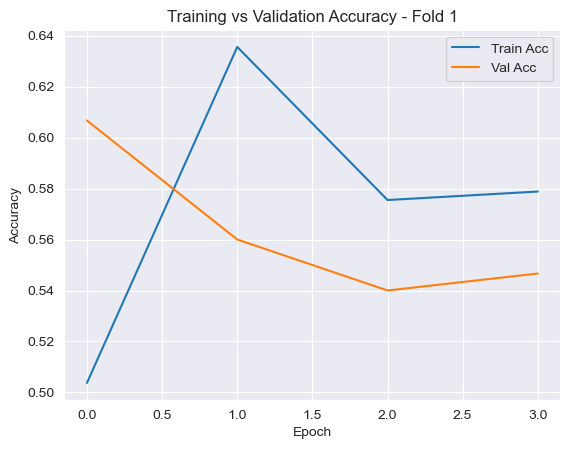

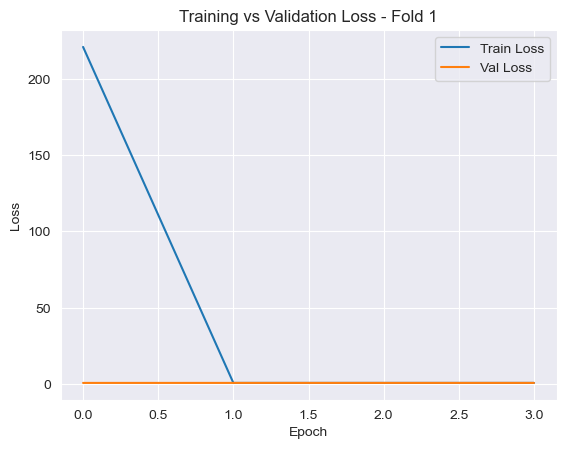

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 501ms/step


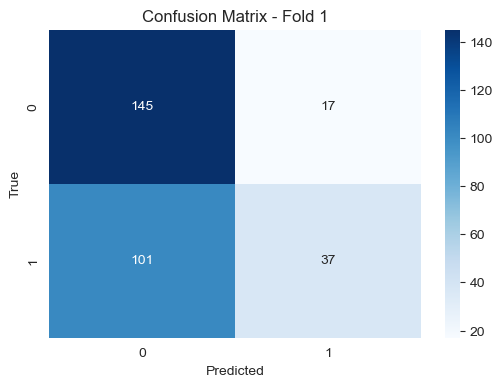

              precision    recall  f1-score   support

           0       0.59      0.90      0.71       162
           1       0.69      0.27      0.39       138

    accuracy                           0.61       300
   macro avg       0.64      0.58      0.55       300
weighted avg       0.63      0.61      0.56       300


Training fold 2...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5294 - loss: 273.3157 - val_accuracy: 0.5667 - val_loss: 2.4033
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 998ms/step - accuracy: 0.5707 - loss: 1.1278 - val_accuracy: 0.5667 - val_loss: 0.6857
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 987ms/step - accuracy: 0.5881 - loss: 0.8356 - val_accuracy: 0.5733 - val_loss: 0.6795
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5331 - loss: 4.0814 - val_accuracy: 0.5667 - val_loss: 0.6857
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5762 - loss: 0.6835 - val_accuracy: 0.5667 - val_loss: 0.6847
Epoch 6/10
38/3

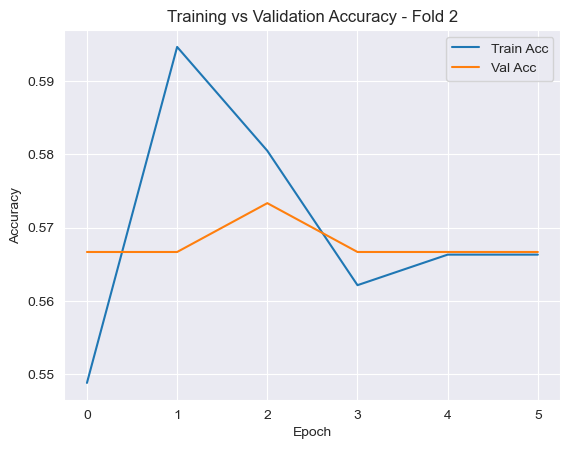

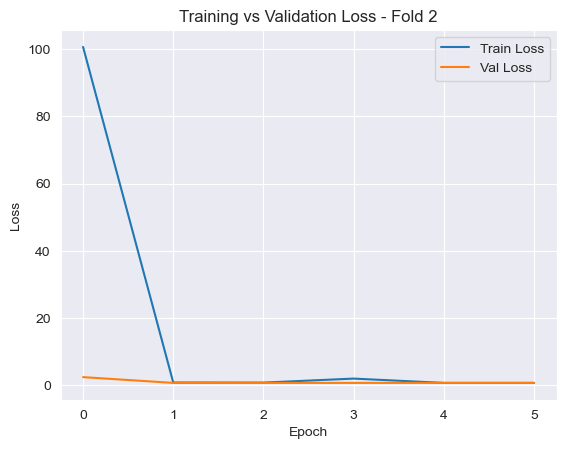

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step


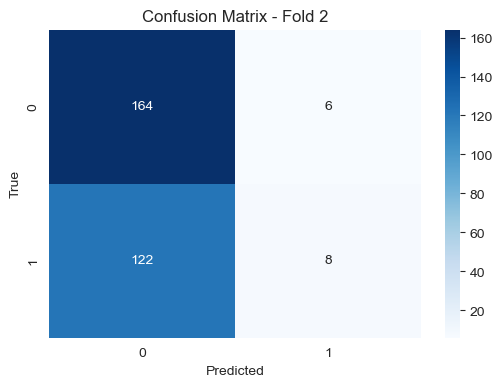

              precision    recall  f1-score   support

           0       0.57      0.96      0.72       170
           1       0.57      0.06      0.11       130

    accuracy                           0.57       300
   macro avg       0.57      0.51      0.42       300
weighted avg       0.57      0.57      0.46       300


Training fold 3...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4872 - loss: 815.8347 - val_accuracy: 0.6033 - val_loss: 0.6841
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 973ms/step - accuracy: 0.6076 - loss: 0.6683 - val_accuracy: 0.6633 - val_loss: 0.6449
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 961ms/step - accuracy: 0.6928 - loss: 0.5968 - val_accuracy: 0.7000 - val_loss: 0.5788
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 957ms/step - accuracy: 0.8083 - loss: 0.4368 - val_accuracy: 0.7400 - val_loss: 0.5685
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 957ms/step - accuracy: 0.8395 - loss: 0.4884 - val_accuracy: 0.7367 - val_loss: 0.7701
Epoch 6/1

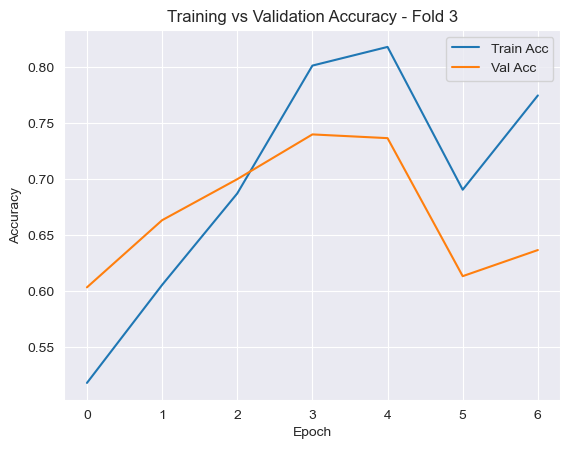

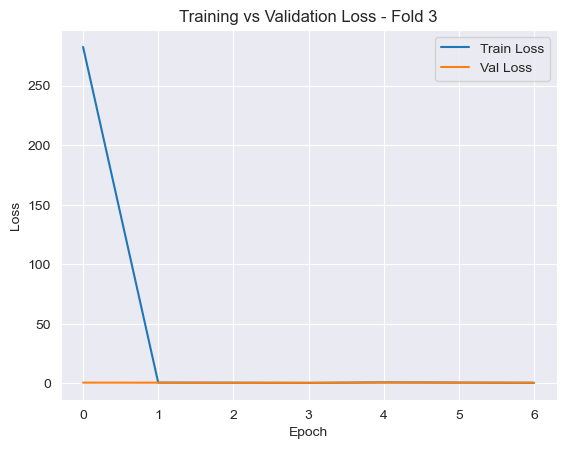

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step


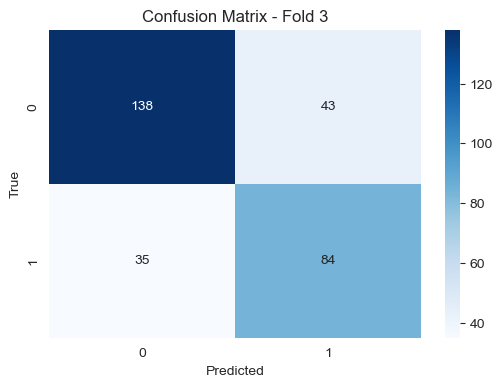

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       181
           1       0.66      0.71      0.68       119

    accuracy                           0.74       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300


Training fold 4...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5077 - loss: 669.1460 - val_accuracy: 0.5600 - val_loss: 0.6885
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5747 - loss: 0.6998 - val_accuracy: 0.5967 - val_loss: 0.6886
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 984ms/step - accuracy: 0.5894 - loss: 0.6787 - val_accuracy: 0.5967 - val_loss: 0.6843
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 983ms/step - accuracy: 0.5494 - loss: 0.6875 - val_accuracy: 0.5967 - val_loss: 0.6801
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 979ms/step - accuracy: 0.5633 - loss: 0.6842 - val_accuracy: 0.6000 - val_loss: 0.6768
Epoch 6/10
3

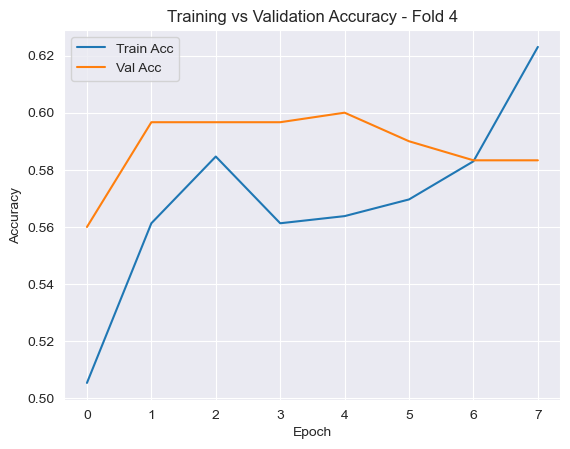

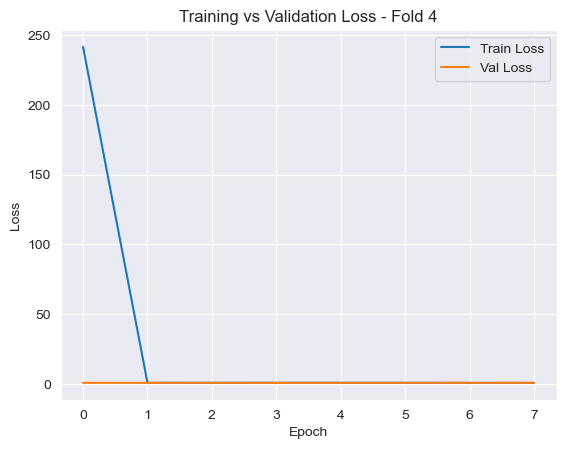

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step


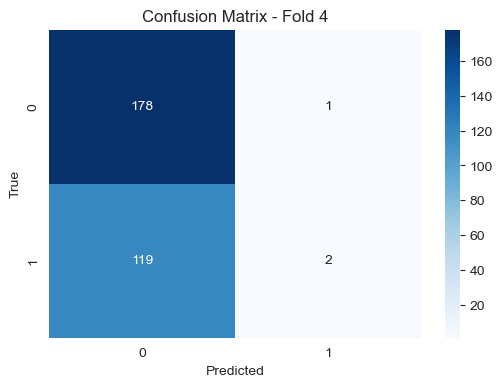

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       179
           1       0.67      0.02      0.03       121

    accuracy                           0.60       300
   macro avg       0.63      0.51      0.39       300
weighted avg       0.63      0.60      0.46       300


Training fold 5...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5243 - loss: 312.1314 - val_accuracy: 0.6555 - val_loss: 0.6347
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6905 - loss: 0.6084 - val_accuracy: 0.6722 - val_loss: 0.6020
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7322 - loss: 0.5564 - val_accuracy: 0.6990 - val_loss: 0.5394
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8635 - loss: 0.3406 - val_accuracy: 0.7358 - val_loss: 0.5919
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 986ms/step - accuracy: 0.9106 - loss: 0.2213 - val_accuracy: 0.7425 - val_loss: 0.5754
Epoch 6/10
38/38 ━

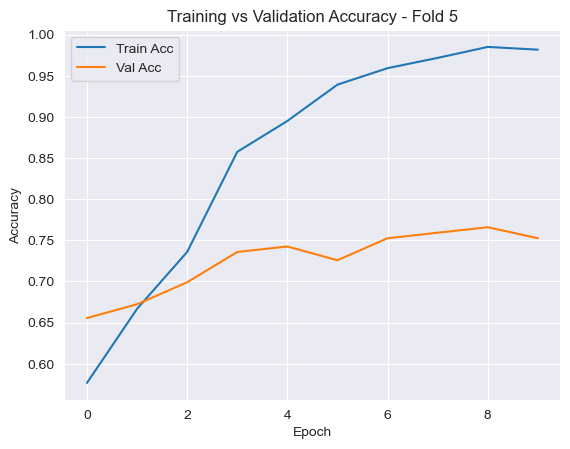

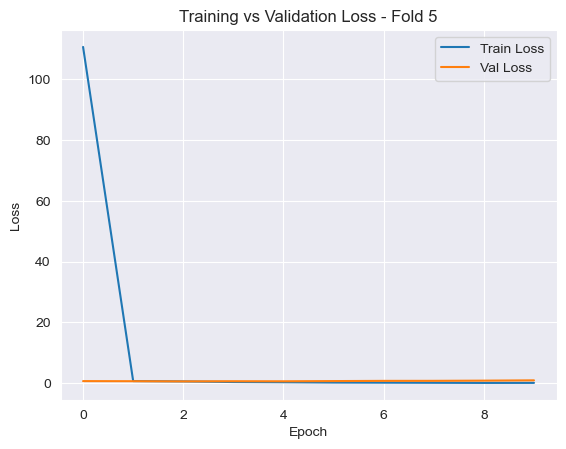

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 493ms/step


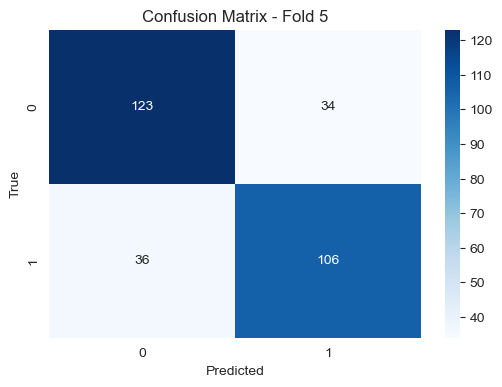

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       157
           1       0.76      0.75      0.75       142

    accuracy                           0.77       299
   macro avg       0.77      0.76      0.77       299
weighted avg       0.77      0.77      0.77       299



In [12]:
for train_idx, val_idx in kf.split(X):
    print(f"\nTraining fold {fold}...")

    # Create train and validation splits
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Build the model
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    scores = model.evaluate(X_val, y_val, verbose=0)
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    print(f"Fold {fold} - Loss: {scores[0]:.4f} - Accuracy: {scores[1]:.4f}")

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Validation Accuracy - Fold {fold}')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss - Fold {fold}')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(classification_report(y_val, y_pred))

    fold += 1

In [13]:
# Summary
print("\nCross-validation results:")
print(f"Average Accuracy: {np.mean(acc_per_fold):.4f} \u00b1 {np.std(acc_per_fold):.4f}")
print(f"Average Loss: {np.mean(loss_per_fold):.4f} \u00b1 {np.std(loss_per_fold):.4f}")


Cross-validation results:
Average Accuracy: 0.6572 ± 0.0794
Average Loss: 0.6788 ± 0.0691
